# Spherical harmonics and the angular power spectrum

We use the `scipy` library to plot spherical harmonics in 3D. This notebook largely follows the example from the `scipy` docs, with some small changes to allow for a single $\ell, m$ pair to be plotted, or a grid of many pairs. 

Why are we interested in this? Spherical harmonics appear often in cosmology, since we are dealing with fields on the (spherical) sky. 

Consider the field $f(\theta, \phi)$, a function of the spherical polar coordinates $\theta, \phi$. We can perform a multipole expansion of the field,
\begin{equation}
f(\theta, \phi) = \sum a_{\ell m} Y_{\ell m}(\theta, \phi),
\end{equation}
where $Y_{\ell m}(\theta, \phi)$ are the spherical harmonics which form an orthonormal set of functions over the sphere.

The multipole coefficients $a_{\ell m}$ are defined via
\begin{equation}
a_{\ell m} = \int Y_{\ell m}^*(\theta, \phi) f(\theta, \phi) d\Omega,
\end{equation}
where $d\Omega = \sin \theta d\theta \phi$ is the integration measure for integrating over the surface of a sphere.

Let us take the cosmic microwave background temperature field as our field $f(\theta, \phi)$. Anisotropies in this field are (primarily) due to primordial perturbations, which are thought to be Gaussian. This means that the multipole coefficients $a_{\ell m}$ are also Gaussian random variables.

The expectation value is zero,
\begin{equation}
\langle a_{\ell m} \rangle = 0,
\end{equation}
since in the case of the CMB, we expect positive and negative deviations from the mean temperature to average to zero. The variance, $\langle |a_{\ell m}|^2 \rangle$, is thus the quantity of interest, giving the typical size of the $a_{\ell m}$.

**A key point**: the $\ell$ indices are responsible for the angular size of the anisotropies; the $m$ indices are responsible for the pattern of the anisotropies (this can be seen in the visualisation below). This means that the expectation values mentioned above are not dependent on $m$. This leads us to define
\begin{equation}
C_{\ell} \equiv \langle |a_{\ell m}|^2 \rangle =  \frac{1}{2\ell + 1} \sum_{m} \langle |a_{\ell m}|^2 \rangle,
\end{equation}
where $C_{\ell}$ is called the **angular power spectrum**.

In the case of the CMB, we can further relate this to the variance of the temperature field,
\begin{equation}
\left\langle \left( \frac{\delta T(\theta, \phi)}{T}\right)^2 \right\rangle = \sum_{\ell} \frac{2\ell + 1}{4\pi} C_{\ell}.
\end{equation}

Let us now visualise some spherical harmonics.

In [1]:
# import numpy for arrays
import numpy as np

# import the spherical harmonics function
from scipy.special import sph_harm

# import tools from matplotlib for plotting
from matplotlib import rc, rcParams, gridspec, colormaps, pyplot as plt

# import cmasher for nice colourmaps and cmap utilities
import cmasher as cmr

# import warnings to suppress irrelevant jupyter nb warnings
import warnings
warnings.filterwarnings('ignore')

# use serif fonts
rc('text', usetex=True)
rc('font', family='serif')
rcParams.update({'font.size': 24})

# show figures inline (%matplotlib notebook can be used for interactive 3D figures)
%matplotlib inline

# choose any matplotlib or cmasher colourmap
# matplotlib maps can be accessed via e.g. cm = colormaps['twilight']
cm = cmr.infinity 

# where figures will be saved
path = r'/home/natalie/Documents/Projects/los_effects/six_times_two_point/figures/sphar/'

In [2]:
def plot_sphar(l, m, cmap, grid, ax):
    '''
    function to compute and plot spherical harmonics
    l: first index (integer)
    m: second index (integer)
    cmap: colour map (matplotlib or cmasher cmap object)
    grid: if True, plots grid of many ell, m pairs. if False, plots a single pair
    ax: axes object to draw on (should be None in the case of grid=False)
    '''
    
    # angles for the spherical harmonics
    theta = np.linspace(0, np.pi, 100)
    phi   = np.linspace(0, 2*np.pi, 100)
    
    # make a grid of the angles
    theta_grid, phi_grid = np.meshgrid(theta, phi)
    
    # Cartesian coordinates from angles
    x = np.sin(theta_grid) * np.cos(phi_grid)
    y = np.sin(theta_grid) * np.sin(phi_grid)
    z = np.cos(theta_grid)
    
    # compute the spherical harmonics
    ylm = sph_harm(m, l, theta_grid, phi_grid).real
    
    # normalise the colourmap
    fmax, fmin = ylm.max(), ylm.min()
    fcolors = (ylm - fmin)/(fmax - fmin)
    
    # check the grid settings and set up fig, ax if no grid passed
    if grid == True:
        pass
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        fig.set_tight_layout(True)
    
    if l == m == 0:
        # choose a solid colour from the cmap for the monopole
        fc = cmr.take_cmap_colors(cmap, 1, cmap_range=(0.9, 1.0), return_fmt='hex')
        # plot the monople
        ax.plot_surface(x, y, z, color=fc[0])
    else:
        # plot higher order moments; for faster plotting you can increase the strides (default is 10)
        # more info on kwargs: https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html#surface-plots
        ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cmap(fcolors))
    
    # turn off all the axis labels etc
    ax.set_axis_off()
    
    # title the axis
    ax.set_title('$Y_{{{}{}}}$'.format(l,m))
    
    return 

We can plot a single pair of $(\ell,m)$ by calling the function in this way:

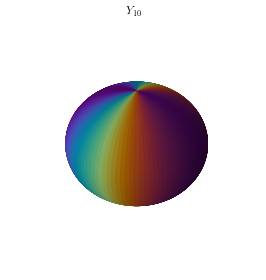

In [3]:
plot_sphar(l=1, m=0, cmap=cm, grid=False, ax=None)

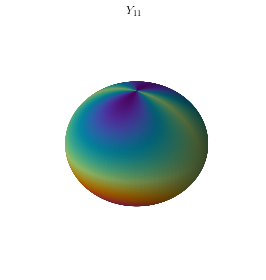

In [4]:
plot_sphar(l=1, m=1, cmap=cm, grid=False, ax=None)

... or we can plot many pairs up to a given $\ell_{\mathrm max}$ by passing a GridSpec object to the plotter. In this case we have to initialise the figure and axes outside the function and pass the ax object to it.

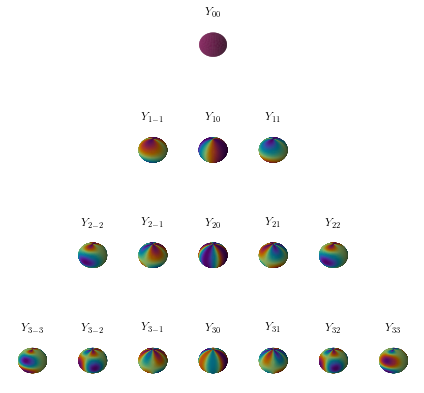

In [5]:
ell_max = 3

fig = plt.figure(figsize=(6,6))

grid = gridspec.GridSpec(ncols=2*ell_max+1, nrows=ell_max+1, figure=fig)

for ell in range(ell_max+1):
    for emm in range(-ell, ell+1): 
        ax = fig.add_subplot(grid[ell, emm+ell_max], projection='3d')
        plot_sphar(l=ell, m=emm, cmap=cm, grid=True, ax=ax)

grid.tight_layout(fig)

plt.savefig(path + 'sphar_grid.pdf', rasterized=True)